In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

import torch
import kornia
import torchvision

In C:\Users\selcu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\selcu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\selcu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
img_bgr = cv2.imread("../KendiResmim.jpg", cv2.IMREAD_COLOR)
print(img_bgr.shape)

(1198, 1198, 3)


In [3]:
x_bgr = kornia.image_to_tensor(img_bgr, keepdim=False)
x_rgb = kornia.bgr_to_rgb(x_bgr)
print(x_rgb.shape)

torch.Size([1, 3, 1198, 1198])


Normalize

In [4]:
x_rgb = x_rgb.float() / 255.0

45 derece döndür ve genişlet.

In [5]:
data = x_rgb
# döndürme matrisi
alpha = 45.0
angle = torch.ones(1) * alpha

# döndürme işleminin yapılacağı merkez belirlenir.
center: torch.tensor = torch.ones(1, 2)
center[..., 0] = data.shape[3] / 2  # x
center[..., 1] = data.shape[2] / 2  # y


# ölçekleme katsayısı
scale: torch.tensor = torch.ones(1)

# dönüştürme matrisi
trans_matrix = kornia.get_rotation_matrix2d(center, angle, scale)

# dönüştürme uygula
_, _, h, w = data.shape
data_warped = kornia.warp_affine(data.float(), trans_matrix, dsize=(h, w))

numpy dizisine çevir

In [6]:
img_warped = kornia.tensor_to_image(data_warped)


plot

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


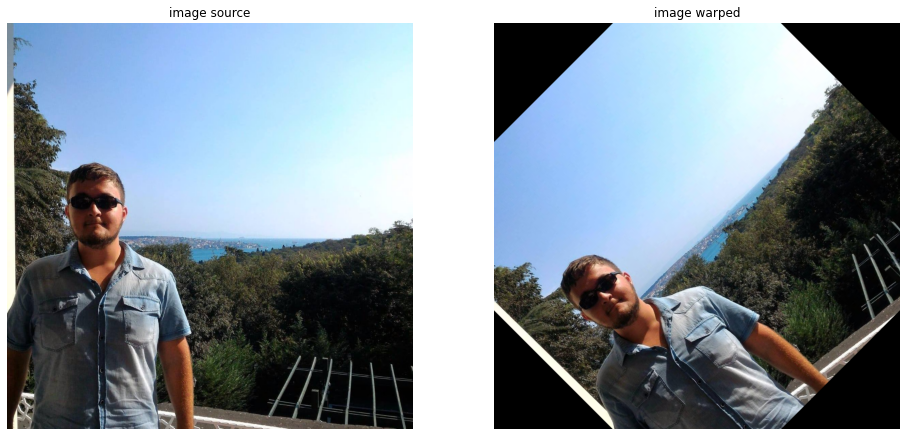

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()

img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
axs[0].axis('off')
axs[0].set_title('image source')
axs[0].imshow(img)

axs[1].axis('off')
axs[1].set_title('image warped')
axs[1].imshow(img_warped)